In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import stan
import arviz as az

import nest_asyncio
nest_asyncio.apply()

In [56]:
N = 100
alpha = 2.3
sigma = 2.
slope = 4.
x = np.random.normal (size=N)
y = alpha + slope * x + sigma * np.random.normal(size=N)

data = {
    'x':x,
    'N':N,
    'y':y
}

In [57]:
program_code = """
data {
  int<lower=1> N;           // Number of observations
  vector[N] x;              // Covariate
  vector[N] y;              // Outcome
}
parameters {
  real alpha;               // Intercept
  real beta;                // Slope
  real<lower=0> sigma;      // Noise
}
model {
  // Priors
  alpha ~ normal(0, 10);
  beta ~ normal(0, 10);
  sigma ~ inv_gamma(1, 1);

  // Likelihood
  y ~ normal(alpha + beta * x, sigma);
  }

"""

In [58]:
model = stan.build(program_code,data)
fit = model.sample(num_chains=3,num_warmup=1000,num_samples=2500)

Building...



Building: found in cache, done.Sampling:   0%
Sampling:  33% (3500/10500)
Sampling:  67% (7000/10500)
Sampling: 100% (10500/10500)
Sampling: 100% (10500/10500), done.
Messages received during sampling:
  Gradient evaluation took 5.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.52 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.21 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/2w/ncm57vw13pxfft0jj32fztn40000gn/T/httpstan_w_laouqd/model_mxje24yi.stan', line 19, column 2 to c

In [59]:
df = fit.to_frame()
df.head()

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta,sigma
draws,,,,,,,,,,
0,-114.685922,0.802345,0.789466,2.0,3.0,0.0,115.677716,2.186050,3.820452,2.027249
1,-116.796011,0.778783,0.753665,2.0,3.0,0.0,117.136916,2.070615,4.401179,1.716606
2,-113.531864,0.976033,0.755033,2.0,7.0,0.0,114.020236,2.209709,3.968245,1.935308
3,-114.682759,0.995064,0.789466,3.0,7.0,0.0,115.899126,2.696263,4.060737,1.877068
4,-113.198086,0.845447,0.753665,2.0,3.0,0.0,118.770631,2.244847,4.011920,1.885901


In [60]:
az.summary(fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,2.353,0.191,1.991,2.709,0.002,0.002,6734.0,5255.0,1.0
beta,4.055,0.198,3.681,4.421,0.002,0.002,7763.0,5887.0,1.0
sigma,1.883,0.136,1.628,2.132,0.002,0.001,6434.0,5255.0,1.0


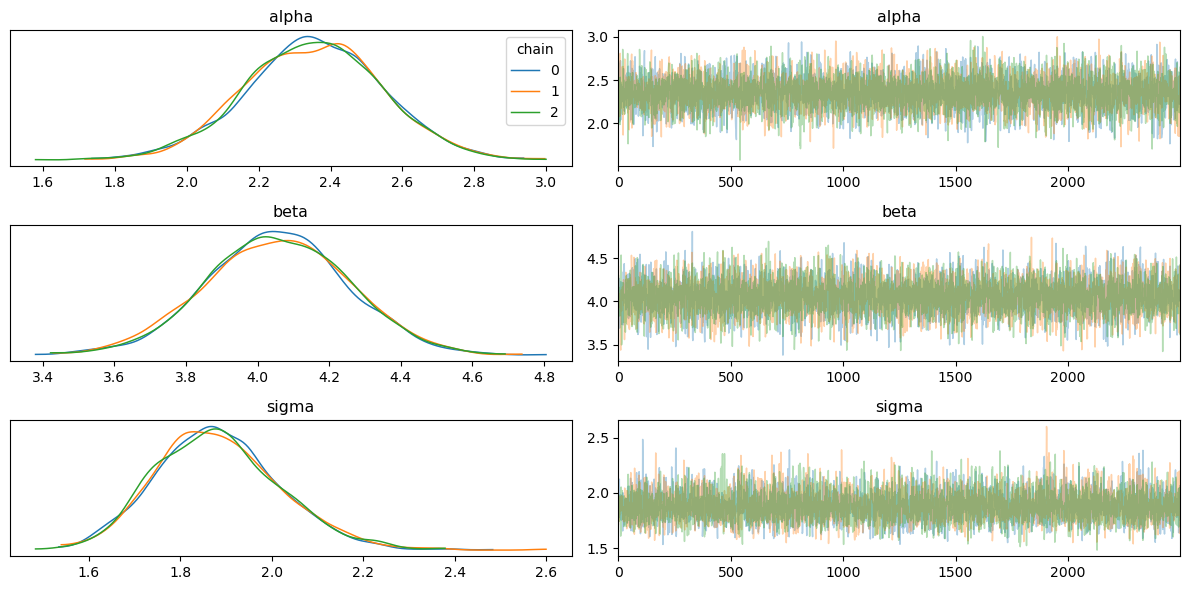

In [61]:
f = az.plot_trace(fit, compact=False, legend=True)
plt.tight_layout()